In [1]:
from IPython.display import display, Image

import pandas as pd

import yaml
import ast

from dms_struct.colorschemes import ValueToColorMap
from dms_struct.struct_widget import colored_struct

_ColormakerRegistry()

In [2]:
df = pd.read_csv('../dataframes/h3n2_ha_12y_hi_egg.csv')
top_muts = ['T160K', 'G186V', 'L194P', 'T203I', 'S219F', 'S219Y', 'H156Q', 'H156R', 'D225G', 'N246H', 'A138S']

In [82]:
#Determine prevalence of each mutation
#pdb_chain A is HA1
all_egg_muts = []
top_egg_muts = []


for egg_muts in df['egg_muts']:
    for egg_mut in ast.literal_eval(egg_muts):
        all_egg_muts.append(egg_mut)
        if egg_mut in top_muts:
            top_egg_muts.append(egg_mut)
            
all_muts_count = dict(zip(list(all_egg_muts),[list(all_egg_muts).count(i) for i in list(all_egg_muts)]))
top_muts_count = dict(zip(list(top_egg_muts),[list(top_egg_muts).count(i) for i in list(top_egg_muts)]))

all_muts_df = pd.DataFrame(list(all_muts_count.items()), columns=['mutation','count'])
all_muts_df['site'] = all_muts_df['mutation'].str[1:-1]
all_muts_df['freq'] = all_muts_df['count']/len(df)
all_muts_df['pdb_chain'] = 'A'
all_sites_df = all_muts_df.groupby('site').sum().reset_index()
all_sites_df['pdb_chain'] = 'A'

top_muts_df = pd.DataFrame(list(top_muts_count.items()), columns=['mutation','count'])
top_muts_df['site'] = top_muts_df['mutation'].str[1:-1]
top_muts_df['freq'] = top_muts_df['count']/len(df)
top_muts_df['pdb_chain'] = 'A'
top_sites_df = top_muts_df.groupby('site').sum().reset_index()
top_sites_df['pdb_chain'] = 'A'
top_sites_df['zoom_site'] = True

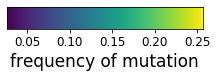

In [83]:
#Make color bar for frequency of mutation
colormapper = ValueToColorMap(top_sites_df['freq'].min(),
                              top_sites_df['freq'].max())

_ = colormapper.scale_bar(label='frequency of mutation', orientation='horizontal')

In [84]:
#Add color hex code to dataframe
top_sites_df = top_sites_df.assign(color=lambda x: (x['freq']
                                          .apply(colormapper.val_to_color)
                                          )
                         )

In [85]:
#Sites are invisible if not in the dataframe, so make all other positions gray, and no zoom
grey_sites = []
for pos in range(1,324):
    if pos not in list((top_sites_df['site'].astype(int))):
        grey_sites.append({'site':str(pos), 'pdb_chain':'A', 'count':0, 'freq':0.0, 'zoom_site':False, 'color':'gray'})
grey_sites_df = pd.DataFrame(grey_sites)
map_df = pd.concat([top_sites_df, grey_sites_df], axis=0)

/Users/katekistler/anaconda3/envs/nextstrain/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [86]:
with open('pdb_orientations.yaml') as f:
    orientation = yaml.safe_load(f)['4o5n']

In [116]:
w_cartoon = colored_struct(
                pdb='4o5n',
                prop_df=map_df,
                chain_col='pdb_chain',
                site_col='site',
                highlight_col='zoom_site',
#                 representation=['surface', 'spacefill'],
                orientation=orientation,
                )
w_cartoon

NGLWidget()

In [118]:
#take static image
image = w_cartoon.render_image(trim=True, factor=3)
display(image)

#Save static image
with open('top_muts_mapped.png', 'wb') as f:
    f.write(image.value)
        
display(Image('top_muts_mapped.png'))

Image(value=b'', width='99%')

In [114]:
def map_ha_muts(df): 
    #Make color bar for frequency of mutation
    colormapper = ValueToColorMap(df['freq'].min(),
                                  df['freq'].max())

    _ = colormapper.scale_bar(label='frequency of mutation', orientation='horizontal')

    #Add color hex code to dataframe
    df = df.assign(color=lambda x: (x['freq'].apply(colormapper.val_to_color)))
    
    #Sites are invisible if not in the dataframe, so make all other positions gray, and no zoom
    grey_sites = []
    for pos in range(1,324):
        if pos not in list((df['site'].astype(int))):
            grey_sites.append({'site':str(pos), 'pdb_chain':'A', 'count':0, 'freq':0.0, 'zoom_site':False, 'color':'gray'})
    grey_sites_df = pd.DataFrame(grey_sites)
    map_df = pd.concat([df, grey_sites_df], axis=0, sort=True)

    #Open HA structure file
    with open('pdb_orientations.yaml') as f:
        orientation = yaml.safe_load(f)['4o5n']

    #Make cartoon 
    ha_cartoon = colored_struct(
                    pdb='4o5n',
                    prop_df=map_df,
                    chain_col='pdb_chain',
                    site_col='site',
                    highlight_col='zoom_site',
#                     representation=['surface', 'spacefill'],
                    orientation=orientation,
                    )
    ha_cartoon
    return(ha_cartoon)
    

NGLWidget()

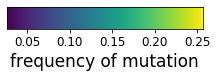

In [115]:
map_ha_muts(top_sites_df)